<a href="https://colab.research.google.com/github/s-im-ran/Machine-Learning/blob/main/7_Ridge%2CLasso%2CElasticNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/forestfire.csv")


In [ ]:
df.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df=df.drop(['day','month','year'],axis=1)

In [ ]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df['Classes']=df['Classes'].str.strip()

In [ ]:
df['Classes'].replace({'fire':'fire','not fire':'not fire'},inplace =True)
print(df['Classes'].unique())

['not fire' 'fire']


In [ ]:
from sklearn.preprocessing import LabelEncoder
df['class_encoded']=LabelEncoder().fit_transform(df['Classes'])

In [ ]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,class_encoded
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,1


In [ ]:
print(df['Classes'].value_counts())

fire        137
not fire    106
Name: Classes, dtype: int64


In [ ]:
print(df['class_encoded'].value_counts())

0    137
1    106
Name: class_encoded, dtype: int64


In [ ]:
df=df.drop(['Classes'],axis=1)

In [ ]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,class_encoded
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [ ]:
X=df.drop('FWI',axis=1)
y=df['FWI']

In [ ]:
X.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Region,class_encoded
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.269555,-0.516015
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.402682,0.432161
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,-0.181160,0.069964
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.040013,0.379097
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.222241,-0.769492
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.192089,-0.585658
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,-0.078734,-0.511123
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.263197,-0.735197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.089408,-0.586639
Region,0.269555,-0.402682,-0.181160,-0.040013,0.222241,0.192089,-0.078734,0.263197,0.089408,1.000000,-0.162347


<Axes: >

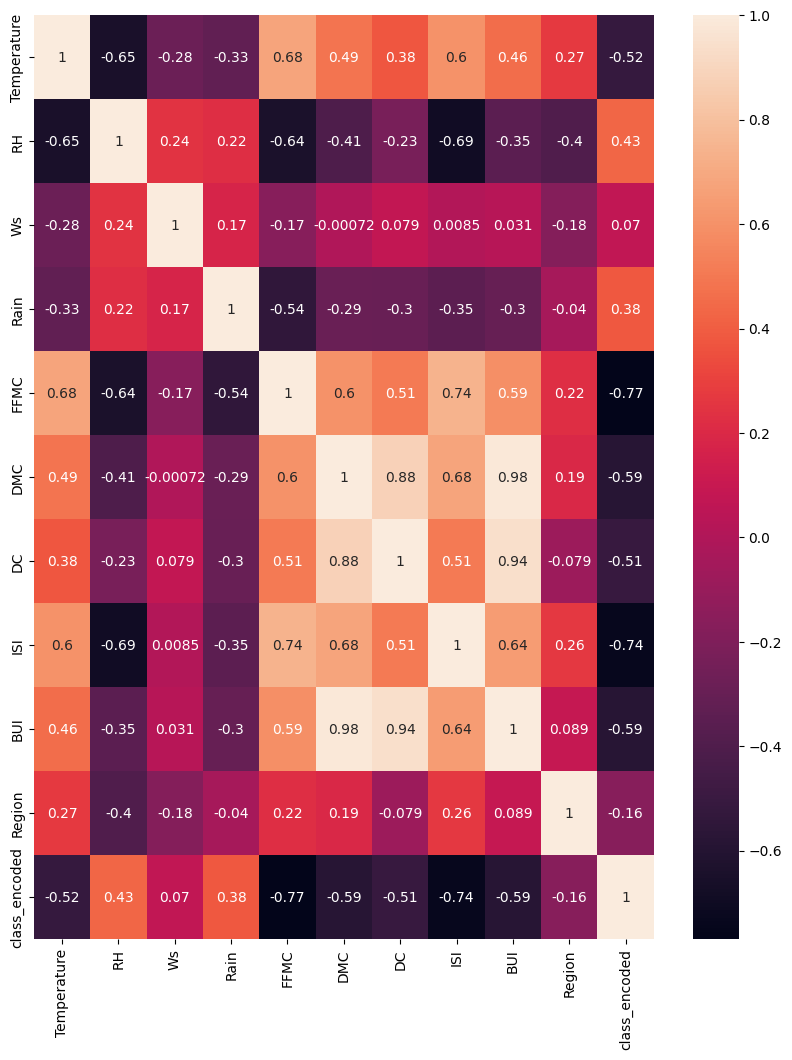

In [ ]:
plt.figure(figsize=(10,12))
sns.heatmap(X.corr(),annot=True)

In [ ]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Region,class_encoded
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,1


In [ ]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [ ]:
#implementing standard scaler
from sklearn.preprocessing import StandardScaler
X_train_scaled=StandardScaler().fit_transform(X_train)
X_test_scaled=StandardScaler().fit_transform(X_test)

In [ ]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.77269802,
        -0.98907071,  1.10431526],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.90344718,
         1.01105006,  1.10431526],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  0.38339978,
         1.01105006, -0.90553851],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.03419633,
        -0.98907071,  1.10431526],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.18383528,
         1.01105006, -0.90553851],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.99290713,
        -0.98907071,  1.10431526]])

In [ ]:
#LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred=lr.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mae:",mse)
print("R2 score",score)

mae: 35.191673791128586
R2 score 0.9631237047751694


In [ ]:
#LassoRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
l=Lasso()
l.fit(X_train_scaled,y_train)
y_pred=l.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mae:",mae)
print("R2 score",score)

mae: 0.8967913779542913
R2 score 0.9751919608268176


In [ ]:
#RidgeRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
l=Ridge()
l.fit(X_train_scaled,y_train)
y_pred=l.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mae:",mae)
print("R2 score",score)

mae: 0.9862632654772763
R2 score 0.9645024126089795


In [ ]:
#ElasticnetRegression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
l=ElasticNet()
l.fit(X_train_scaled,y_train)
y_pred=l.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mae:",mae)
print("R2 score",score)

mae: 1.4688359019578359
R2 score 0.9268080308163352
